In [69]:
# Libraries
library(readxl)
library(stringr)
library(ggplot2)

In [70]:
# Variables
in_url <- "https://syncandshare.desy.de/index.php/s/CrDgDwHRQNDWYcj"
in_url <- paste0(in_url, "/download")
in_file <- "docs/overview.xlsx"

# Colors
cols <- list(
  type = c(
      "Hospital-admission" = "grey", 
      "ICU-admission" = "gold", 
      "Ventilation" = "purple", 
      "ECMO" = "red"
  )
)

In [71]:
# Download data
download.file(in_url, in_file)

In [80]:
# Read data
data <- list()
sheets <- excel_sheets(in_file)
for (i in sheets) {
    data[[i]] <- read_excel(path = in_file, sheet = i)
}
names(data)

[1] "libraries"    "samples"      "patients"     "examinations" "hto_features"
[6] "hto_indices"

In [81]:
# Select sequenced libraries
libs <- data$libraries
libs$sequenced <- !is.na(libs$run)
libs <- libs[libs$sequenced, ]
nrow(libs)


# Select sequenced samples
samples <- data$samples
index <- unlist(str_split(samples$sample, ","))
index <- unlist(str_split(index, ":"))
index <- str_detect(index, "BAL")
samples$sequenced <- index

[1] 42

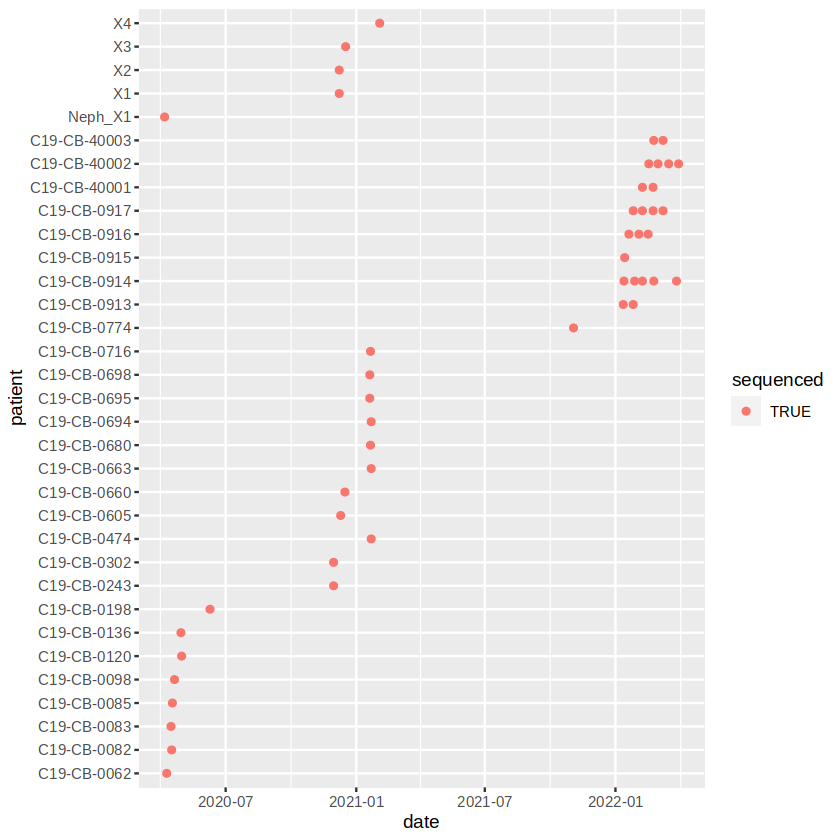

In [82]:
ggplot(samples, aes(date, patient, col = sequenced)) +
geom_point()